In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random
import itertools


In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/My Drive/SNA/web-Google.txt"


In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'web-Google.txt'],
 ['#', 'Webgraph', 'from', 'the', 'Google', 'programming', 'contest,', '2002'],
 ['#', 'Nodes:', '875713', 'Edges:', '5105039'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '11342'],
 ['0', '824020'],
 ['0', '867923'],
 ['0', '891835'],
 ['11342', '0'],
 ['11342', '27469'],
 ['11342', '38716'],
 ['11342', '309564'],
 ['11342', '322178'],
 ['11342', '387543'],
 ['11342', '427436'],
 ['11342', '538214'],
 ['11342', '638706'],
 ['11342', '645018'],
 ['11342', '835220'],
 ['11342', '856657'],
 ['11342', '867923'],
 ['11342', '891835'],
 ['824020', '0'],
 ['824020', '91807'],
 ['824020', '322178'],
 ['824020', '387543'],
 ['824020', '417728'],
 ['824020', '438493'],
 ['824020', '500627'],
 ['824020', '535748'],
 ['824020', '695578'],
 ['824020', '867923'],
 ['824020', '891835'],
 ['867923', '0'],
 ['867923', '11342'],
 ['867923', '136593'],
 ['867923', '414

In [5]:
#taking 1500 random samples from the data
sample = random.sample(res, 1500)
filename=open('data14.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
sample

[['593296', '571672'],
 ['117690', '556551'],
 ['646303', '51203'],
 ['532559', '870843'],
 ['16327', '369853'],
 ['457148', '757255'],
 ['29936', '182389'],
 ['304110', '772466'],
 ['612464', '249144'],
 ['659943', '331166'],
 ['64560', '396789'],
 ['165498', '184338'],
 ['769619', '163075'],
 ['38679', '884548'],
 ['762505', '477024'],
 ['880284', '749140'],
 ['64919', '568104'],
 ['822819', '592986'],
 ['681466', '58541'],
 ['358956', '357418'],
 ['621646', '711593'],
 ['604853', '270548'],
 ['528619', '800303'],
 ['166043', '302558'],
 ['787432', '595119'],
 ['716451', '633875'],
 ['377652', '888032'],
 ['762282', '173586'],
 ['279888', '915103'],
 ['768183', '424971'],
 ['137167', '797980'],
 ['781256', '799786'],
 ['195508', '104993'],
 ['726599', '821179'],
 ['377180', '682079'],
 ['141277', '553551'],
 ['510404', '873361'],
 ['406915', '481104'],
 ['102418', '90728'],
 ['141152', '249472'],
 ['285683', '815647'],
 ['756423', '424839'],
 ['17905', '646567'],
 ['427946', '333236'

In [7]:
G1=nx.read_edgelist('data14.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 2338
Number of edges: 1189
Average in degree:   0.5086
Average out degree:   0.5086


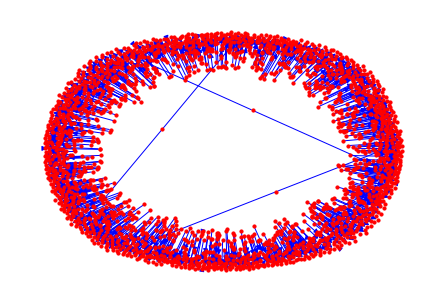

In [8]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

###Giant Component

In [9]:
strongly_connected_comp = nx.strongly_connected_components(G2)
Graph1 = max(strongly_connected_comp, key = len)
N = len(G2)


In [10]:
Ng = len(Graph1)

In [11]:
Ng

434818

In [12]:
Ng/N

0.49653025591717836

In [13]:
print(Graph1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



###Girvan Newman Algorithm

In [14]:
def girvan_newman(G, most_valuable_edge=None):
# If the graph is already empty, then its connected components will be returned
  if G.number_of_edges() == 0:
    yield tuple(nx.connected_components(G))
    return
    #Use edge betweeness centrality if no function is given for computing most valuable edge
  if most_valuable_edge is None:
    def most_valuable_edge(G):
      betweenness = nx.edge_betweenness_centrality(G)
      return max(betweenness, key=betweenness.get)
  # The copy of G here must include the edge weight data.
  g = G.copy().to_undirected()
  g.remove_edges_from(nx.selfloop_edges(g))
  
  while g.number_of_edges() > 0:
    yield _without_most_central_edges(g, most_valuable_edge)



In [15]:
def _without_most_central_edges(G, most_valuable_edge):
  number_connected = nx.number_connected_components(G)
  new_comp = number_connected
  while new_comp <= number_connected:
    mvedge = most_valuable_edge(G)
    G.remove_edge(*mvedge)
    print("THE REMOVED EDGES ARE : ",end="")
    print(*mvedge)
    new_components = tuple(nx.connected_components(G))
    new_comp = len(new_components)
    return new_components


In [16]:
component_girvan = girvan_newman(G1)

In [17]:
print("Step 1:")
step1 = next(component_girvan)
for i in range(50):
  print(step1[i],end="")

Step 1:
THE REMOVED EDGES ARE : 308857 555924
{593296, 571672}{117690, 556551}{51203, 646303}{870843, 532559}{369853, 16327}{457148, 757255}{29936, 182389}{50520, 772466, 304110}{612464, 249144}{331166, 659943}{64560, 396789}{165498, 184338}{163075, 497065, 769619, 636398}{884548, 38679}{477024, 762505}{880284, 749140}{568104, 64919}{592986, 822819}{681466, 58541}{357418, 358956}{711593, 621646}{270548, 604853}{528619, 800303}{166043, 302558}{787432, 595119}{633875, 716451}{888032, 529272, 377652}{762282, 173586}{279888, 915103}{424971, 768183}{797980, 137167}{781256, 799786}{104993, 195508}{821179, 726599}{377180, 682079}{141277, 553551}{873361, 510404}{481104, 406915}{90728, 102418, 522436, 273762}{141152, 249472}{285683, 815647}{424839, 756423}{17905, 646567}{427946, 333236}{189168, 589340}{566945, 168595}{561329, 541090}{246817, 466323}{265435, 675919}{228705, 728926}

In [18]:
print("Number of Communities in Step 1 are: " + str(len(step1)))


Number of Communities in Step 1 are: 1150


In [19]:
print("Step 2:")
step2 = next(component_girvan)
print("Number of Communities in Step 2 are: " + str(len(step2)))

Step 2:
THE REMOVED EDGES ARE : 769619 163075
Number of Communities in Step 2 are: 1151


In [20]:
step2

({571672, 593296},
 {117690, 556551},
 {51203, 646303},
 {532559, 870843},
 {16327, 369853},
 {457148, 757255},
 {29936, 182389},
 {50520, 304110, 772466},
 {249144, 612464},
 {331166, 659943},
 {64560, 396789},
 {165498, 184338},
 {769619},
 {163075, 497065, 636398},
 {38679, 884548},
 {477024, 762505},
 {749140, 880284},
 {64919, 568104},
 {592986, 822819},
 {58541, 681466},
 {357418, 358956},
 {621646, 711593},
 {270548, 604853},
 {528619, 800303},
 {166043, 302558},
 {595119, 787432},
 {633875, 716451},
 {377652, 529272, 888032},
 {173586, 762282},
 {279888, 915103},
 {424971, 768183},
 {137167, 797980},
 {781256, 799786},
 {104993, 195508},
 {726599, 821179},
 {377180, 682079},
 {141277, 553551},
 {510404, 873361},
 {406915, 481104},
 {90728, 102418, 273762, 522436},
 {141152, 249472},
 {285683, 815647},
 {424839, 756423},
 {17905, 646567},
 {333236, 427946},
 {189168, 589340},
 {168595, 566945},
 {541090, 561329},
 {246817, 466323},
 {265435, 675919},
 {228705, 728926},
 {252379,

In [21]:
print("Step 3:")
step3 = next(component_girvan)
print("Number of Communities in Step 3 are: " + str(len(step3)))

Step 3:
THE REMOVED EDGES ARE : 102418 90728
Number of Communities in Step 3 are: 1152


In [22]:
step3

({571672, 593296},
 {117690, 556551},
 {51203, 646303},
 {532559, 870843},
 {16327, 369853},
 {457148, 757255},
 {29936, 182389},
 {50520, 304110, 772466},
 {249144, 612464},
 {331166, 659943},
 {64560, 396789},
 {165498, 184338},
 {769619},
 {163075, 497065, 636398},
 {38679, 884548},
 {477024, 762505},
 {749140, 880284},
 {64919, 568104},
 {592986, 822819},
 {58541, 681466},
 {357418, 358956},
 {621646, 711593},
 {270548, 604853},
 {528619, 800303},
 {166043, 302558},
 {595119, 787432},
 {633875, 716451},
 {377652, 529272, 888032},
 {173586, 762282},
 {279888, 915103},
 {424971, 768183},
 {137167, 797980},
 {781256, 799786},
 {104993, 195508},
 {726599, 821179},
 {377180, 682079},
 {141277, 553551},
 {510404, 873361},
 {406915, 481104},
 {102418},
 {90728, 273762, 522436},
 {141152, 249472},
 {285683, 815647},
 {424839, 756423},
 {17905, 646567},
 {333236, 427946},
 {189168, 589340},
 {168595, 566945},
 {541090, 561329},
 {246817, 466323},
 {265435, 675919},
 {228705, 728926},
 {2523

In [23]:
print("Step 4:")
step4 = next(component_girvan)
print("Number of Communities in Step 4 are: " + str(len(step4)))

Step 4:
THE REMOVED EDGES ARE : 374181 74397
Number of Communities in Step 4 are: 1153


In [24]:
step4


({571672, 593296},
 {117690, 556551},
 {51203, 646303},
 {532559, 870843},
 {16327, 369853},
 {457148, 757255},
 {29936, 182389},
 {50520, 304110, 772466},
 {249144, 612464},
 {331166, 659943},
 {64560, 396789},
 {165498, 184338},
 {769619},
 {163075, 497065, 636398},
 {38679, 884548},
 {477024, 762505},
 {749140, 880284},
 {64919, 568104},
 {592986, 822819},
 {58541, 681466},
 {357418, 358956},
 {621646, 711593},
 {270548, 604853},
 {528619, 800303},
 {166043, 302558},
 {595119, 787432},
 {633875, 716451},
 {377652, 529272, 888032},
 {173586, 762282},
 {279888, 915103},
 {424971, 768183},
 {137167, 797980},
 {781256, 799786},
 {104993, 195508},
 {726599, 821179},
 {377180, 682079},
 {141277, 553551},
 {510404, 873361},
 {406915, 481104},
 {102418},
 {90728, 273762, 522436},
 {141152, 249472},
 {285683, 815647},
 {424839, 756423},
 {17905, 646567},
 {333236, 427946},
 {189168, 589340},
 {168595, 566945},
 {541090, 561329},
 {246817, 466323},
 {265435, 675919},
 {228705, 728926},
 {2523

In [25]:
print("Step 5:")
step5 = next(component_girvan)
print("Number of Communities in Step 5 are: " + str(len(step5)))

Step 5:
THE REMOVED EDGES ARE : 42930 812640
Number of Communities in Step 5 are: 1154


In [26]:
step5

({571672, 593296},
 {117690, 556551},
 {51203, 646303},
 {532559, 870843},
 {16327, 369853},
 {457148, 757255},
 {29936, 182389},
 {50520, 304110, 772466},
 {249144, 612464},
 {331166, 659943},
 {64560, 396789},
 {165498, 184338},
 {769619},
 {163075, 497065, 636398},
 {38679, 884548},
 {477024, 762505},
 {749140, 880284},
 {64919, 568104},
 {592986, 822819},
 {58541, 681466},
 {357418, 358956},
 {621646, 711593},
 {270548, 604853},
 {528619, 800303},
 {166043, 302558},
 {595119, 787432},
 {633875, 716451},
 {377652, 529272, 888032},
 {173586, 762282},
 {279888, 915103},
 {424971, 768183},
 {137167, 797980},
 {781256, 799786},
 {104993, 195508},
 {726599, 821179},
 {377180, 682079},
 {141277, 553551},
 {510404, 873361},
 {406915, 481104},
 {102418},
 {90728, 273762, 522436},
 {141152, 249472},
 {285683, 815647},
 {424839, 756423},
 {17905, 646567},
 {333236, 427946},
 {189168, 589340},
 {168595, 566945},
 {541090, 561329},
 {246817, 466323},
 {265435, 675919},
 {228705, 728926},
 {2523

###Ravasz Algorithm

In [27]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

In [28]:
Gu=G1.to_undirected()

In [29]:
def create_hc(G, t):
    labels=list(G.nodes())    #node labels
    path_length=[n for n in nx.all_pairs_shortest_path_length(Gu)]
    #the distance matrix D
    dist_mat=np.zeros((len(G),len(G))) 
    G1_list=list(G.nodes())   
    for u,p in path_length:
        for v,dis in p.items():
            dist_mat[G1_list.index(u)][G1_list.index(v)] = dis
            dist_mat[G1_list.index(v)][G1_list.index(u)] = dis
            if u==v:
                dist_mat[G1_list.index(u)][G1_list.index(u)]=0

    # Creating hierarchical cluster (HC)
    # Creating the HCs using the complete/max/farthest point linkage 
    Y = distance.squareform(dist_mat) ## the upper triangular of the distance matrix 
    Z = hierarchy.average(Y)
    
    #For illustrive purposes, partition selection (t) is arbitrary
    membership=list(hierarchy.fcluster(Z,t=t))
    # Creating collection of lists for blockmodel
    part = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        part[p].append(labels[n])
        
    return Z, membership, part

In [30]:
Z, membership, part = create_hc(Gu, t=0.5) 
part.items()

dict_items([(4, [593296, 117690, 646303, 532559, 16327, 457148, 29936, 304110, 612464, 659943, 64560, 165498, 769619, 38679, 762505, 880284, 64919, 822819, 681466, 358956, 621646, 604853, 528619, 166043, 787432, 716451, 377652, 762282, 279888, 768183, 137167, 781256, 195508, 726599, 377180, 141277, 510404, 406915, 102418, 141152, 285683, 756423, 17905, 427946, 589340, 566945, 561329, 246817, 265435, 228705, 803749, 723288, 259780, 348579, 760444, 695146, 273320, 694646, 729508, 542194, 804912, 181133, 601635, 733111, 786468, 223151, 26956, 475947, 730789, 177427, 275605, 830313, 601414, 376950, 9556, 749039, 882079, 345759, 25539, 187078, 136204, 35034, 10450, 615517, 86338, 159973, 715986, 814950, 530438, 502157, 73192, 877562, 536215, 78627, 41245, 100573, 900700, 321758, 440432, 122479, 639057, 506847, 684560, 230564, 163337, 708702, 37799, 291879, 374181, 753147, 860110, 208651, 429244, 742012, 695850, 759103, 14257, 788953, 28472, 803429, 518231, 361953, 667460, 4890, 537200, 7185

In [31]:
part = {}
i = 0
for i in range(len(membership)):
    part[i]=membership[i]

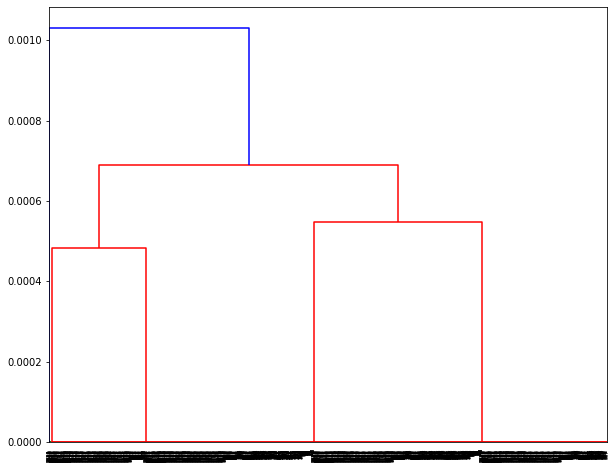

In [32]:
plt.figure(figsize=(10,8))
hierarchy.dendrogram(Z)
plt.show()